In [1]:
from src.predict import predict_on_test
from src.data_gen import DataGenerator


Using TensorFlow backend.


In [2]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.misc import toimage
import os
import yaml
from nltk.metrics.distance import edit_distance

In [3]:
#predicts on the testing set
print('Predicting on test set')
CER, WER, labels_test, pred_test, images_test, dat = predict_on_test('src/config.yml')


Predicting on test set
Instructions for updating:
Colocations handled automatically by placer.
, ,
. .
the the
since surce
of of
, ,
different different
the the
dinner dinner
, '
, ,
' '
Lady Lady
revered revered
if if
contrary contrary
it it
" "
like like
omission onigisin
fifteen Aftern
for for
I ,
, ,
. .
seeking selening
regarded regarded
off off
Mr. Mr.
black black
. .
other other
are are
least least
? ?
passport passpont
, ,
over over
brain brain
hectoring helosing
A A
get get
shopping shorping
, ,
his his
sown sown
seemed SERIND
text rext
his his
month month
. .
and and
whether Nether
more more
I I
; ;
out out
flat flat
the the
of of
. .
it it
with with
waste waste
out out
, ,
based baxed
by by
moving moving
few fiur
of of
of of
took took
to to
suspicion suggicion
existence enitence
. .
sign sign
made made
all all
of of
week-end week-end
that that
prove prove
conventional conventional
food food
ventricles ventricles
really rally
I I
. .
going going
his his
a a
satin satin
as as


In [5]:
#loads the configure file so we can call certain specifics in our next cells
with open('src/config.yml') as f:
    config = yaml.load(f)

In [6]:
#need to user data generator to generate data
test_generator = DataGenerator(config, dat, shuffle=False, use_data_augmentation=False)

In [7]:
for idx,i in enumerate(dat):
    if dat[idx]['label'] == 'any':
        print(idx, i)

362 {'filename': 'm01/m01-104/m01-104-07-02.png', 'label': 'any'}
509 {'filename': 'f07/f07-046b/f07-046b-08-02.png', 'label': 'any'}
573 {'filename': 'b03/b03-114/b03-114-00-01.png', 'label': 'any'}
3669 {'filename': 'a03/a03-006/a03-006-06-03.png', 'label': 'any'}
6433 {'filename': 'g04/g04-026/g04-026-01-00.png', 'label': 'any'}
6689 {'filename': 'k04/k04-050/k04-050-03-00.png', 'label': 'any'}
6984 {'filename': 'a03/a03-066/a03-066-04-00.png', 'label': 'any'}


In [8]:
#pick and index to view the image, actual label and predicted label in the next cell (0 - 11531)
bad_lst = [1387, 1401, 1340, 1524, 1564, 1660, 1867, 8158]

good_lst = [1615, 1770, 3531, 586, 1644]
the_lst = [4655, 1005, 1193, 6702]


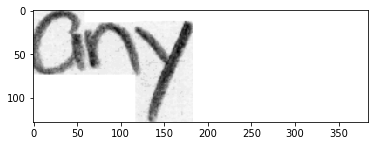

           Actual label:  any
           Predicted Label:  any


<Figure size 432x288 with 0 Axes>

In [8]:
    i = 6984
# for i in the_lst:
    plt.imshow(np.reshape(images_test[i, :, :,:], (test_generator.y_size, test_generator.x_size)), cmap=plt.get_cmap('gray'))
    plt.show()
    print("           Actual label: ", labels_test[i])
    print("           Predicted Label: ", pred_test[i])
    plt.savefig(f'{i}-{labels_test[i]}.png')

In [9]:
#examining distance metrics in more depth
words_identified = 0
characters_identified = 0
char_tot = 0
dist = []
n_dist= []

for i in range(len(pred_test)):
    if labels_test[i] == pred_test[i]:
        words_identified += 1

    levenshtein_distance = edit_distance(labels_test[i], pred_test[i])
    dist.append(levenshtein_distance)
    n_char = np.maximum(len(labels_test[i]), len(pred_test[i]))

    normalized_distance = levenshtein_distance/n_char
    n_dist.append(normalized_distance)
    characters_identified += normalized_distance


(array([7.295e+03, 1.009e+03, 0.000e+00, 5.560e+02, 0.000e+00, 3.470e+02,
        0.000e+00, 1.950e+02, 0.000e+00, 1.050e+02, 7.600e+01, 0.000e+00,
        2.900e+01, 0.000e+00, 1.600e+01, 0.000e+00, 9.000e+00, 0.000e+00,
        6.000e+00, 3.000e+00]),
 array([ 0.  ,  0.55,  1.1 ,  1.65,  2.2 ,  2.75,  3.3 ,  3.85,  4.4 ,
         4.95,  5.5 ,  6.05,  6.6 ,  7.15,  7.7 ,  8.25,  8.8 ,  9.35,
         9.9 , 10.45, 11.  ]),
 <a list of 20 Patch objects>)

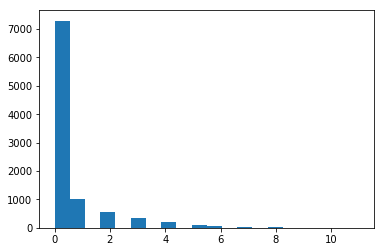

In [10]:
# histogram of unnormalized edit distance metric
plt.hist(dist, bins = 20)

(array([7295.,   16.,  240.,  146.,  231.,  347.,  250.,   56.,  199.,
          19.,  277.,  105.,   26.,  102.,   13.,   50.,   34.,   10.,
           0.,  230.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

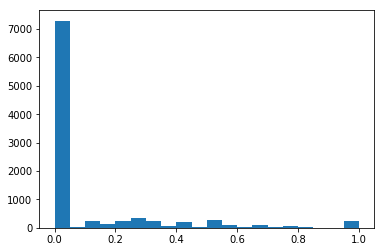

In [11]:
#histogram of the normalized distances
plt.hist(n_dist, bins=20)

In [12]:
#prints the number of words in the testing set that had no errors
count = 0
for i in dist:
    if i ==0:
        count += 1
print(count)

7295


In [13]:
1-(count/len(dat)) #double checking the word error rate with the counts

0.24372797014306447

In [14]:
CER

0.10262625056382918

In [15]:
import pandas as pd

In [16]:
df = pd.DataFrame(dist)

In [17]:
df[0].value_counts()

0     7295
1     1009
2      556
3      347
4      195
5      105
6       76
7       29
8       16
9        9
10       6
11       3
Name: 0, dtype: int64

In [19]:
#create counts as a dataframe
df_sub = df[0].value_counts().reset_index() 

In [20]:
df_sub

,index,0
0,0,7295
1,1,1009
2,2,556
3,3,347
4,4,195
5,5,105
6,6,76
7,7,29
8,8,16
9,9,9


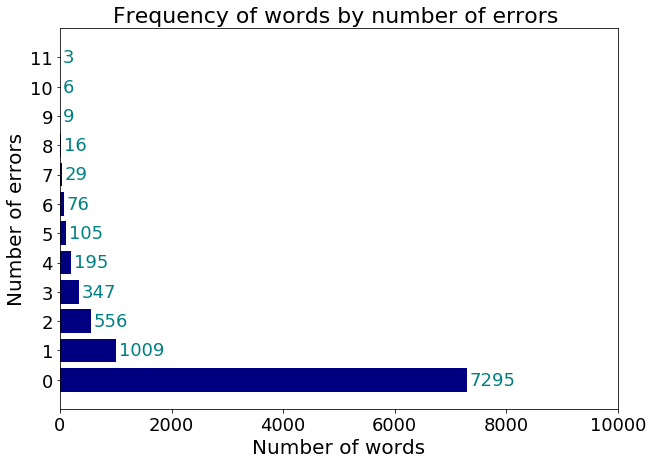

In [21]:
plt.figure(figsize=(10,7))
plt.barh(df_sub['index'], df_sub[0], color = 'navy')
width = 0.75 # the width of the bars 
ind = df_sub['index']
plt.xlabel('Number of words', fontsize = 20)
plt.ylabel('Number of errors', fontsize = 20)
plt.yticks(ind, fontsize = 18)
plt.xticks(fontsize = 18)
# plt.set_yticklabels(x, minor=False)
for i, v in zip(ind, df_sub[0]):
    plt.text(v+50, i, str(v), color='teal', va='center', fontsize = 18)
plt.xlim(0, 10000)
plt.title("Frequency of words by number of errors ", fontsize = 22)
plt.savefig("wordsbyerror_202.png")

In [22]:
WER

0.2437279701430645

In [70]:
# number of characters to iterate over
lst = ['\t', '\n', '\x0b', '\x0c', '\r', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']

In [71]:
d_true = dict((key, 0) for key in lst)

In [72]:
d_error = dict((key, 0) for key in lst)

In [73]:
for true, pred in zip(labels_test, pred_test):
    for i, j in zip(true, pred):
        if i == j:
            d_true[i] += 1
        else:
            d_error[i] += 1
    

In [74]:
df_error = pd.DataFrame(list(d_error.items()), columns = ['char', 'num'])


In [75]:
df_true = pd.DataFrame(list(d_true.items()), columns = ['char', 'num'])

In [76]:
ids = []
for idx, (true, error) in enumerate(zip(df_true['num'], df_error['num'])):
    if true == 0 and error == 0:
        ids.append(idx)

In [77]:
df_error = df_error.drop(ids, axis = 0).reset_index(drop=True)
df_true = df_true.drop(ids, axis = 0).reset_index(drop=True)

In [78]:
df_new = df_true.copy()

In [79]:
df_new['errornum'] = df_error['num']
df_new['fraction'] = df_new['errornum']/(df_new['errornum'] + df_new['num'])
df_new['total'] = (df_new['errornum'] + df_new['num'])
str_fract = str('{}/{}').format(df_new['errornum'], df_new['total'])
df_new['fract'] = 100

In [106]:
lst_anum = ['/', 'Z', 'O', 'u', 'i',"H",'r', 't', 'a',' o','!','.']
df_new_1 = df_new[df_new['char'].isin(lst_anum)].copy()
df_new_1

,char,num,errornum,fraction,total,fract
11,/,0,1,1.000000,1,100
49,Z,0,2,1.000000,2,100
39,O,21,22,0.511628,43,100
70,u,838,211,0.201144,1049,100
67,r,1843,431,0.189534,2274,100
32,H,71,16,0.183908,87,100
58,i,2005,426,0.175237,2431,100
50,a,2579,480,0.156914,3059,100
69,t,2981,346,0.103998,3327,100
10,.,503,27,0.050943,530,100


In [112]:
df_new_1.sort_values('fraction', inplace = True, ascending = False)


In [113]:
fra = [f'{i} / {j}' for i, j in zip(df_new_1['errornum'], df_new_1['total'])]


In [114]:
lst = df_new_1['char']

In [115]:
totals = [i+j for i, j in zip(df_new_1['num'], df_new_1['errornum'])]
errorBars = [i / j * 100 for i, j in zip(df_new_1['errornum'], totals)]
trueBars = [i / j * 100 for i, j in zip(df_new_1['num'], totals)]

''

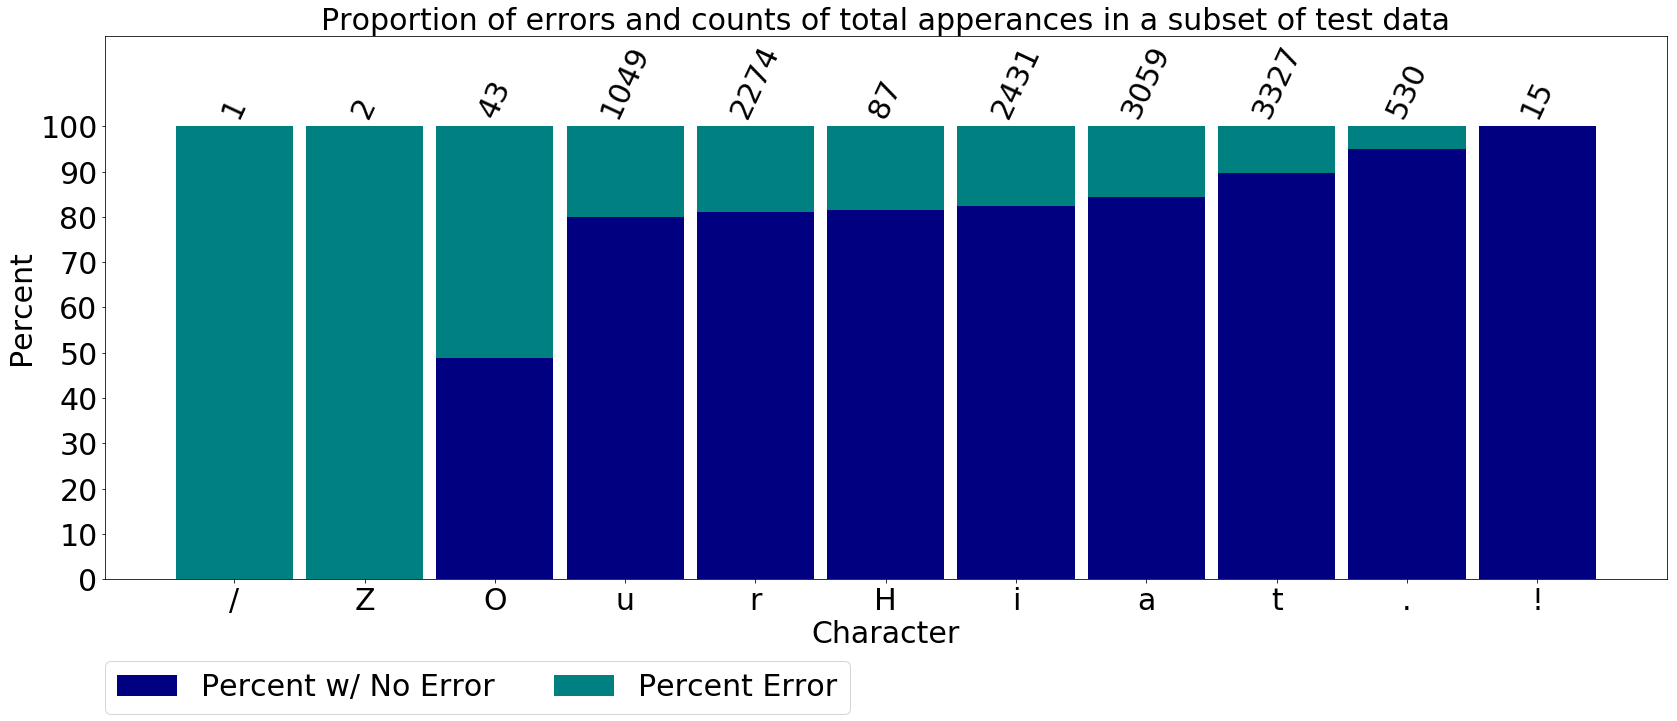

In [118]:
N = len(df_new_1)
ind = np.arange(N)
w = 0.9
plt.figure(figsize=(28,10))
plt.bar(ind, trueBars, width = w, color = 'navy', label = 'Percent w/ No Error')
plt.bar(ind, errorBars, width = w, color = 'teal', bottom = trueBars, label = "Percent Error")
plt.ylabel('Percent', fontsize = 30)
plt.xlabel('Character', fontsize = 30)
plt.xticks(ind, lst, fontsize=30)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 30)
plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=2, ncol=2, borderaxespad=0,fontsize = 30)
for h, (i, v) in zip(df_new_1['fract'], zip(ind, df_new_1['total'])):
    plt.text(i, h +1, str(v), color='black', fontsize = 30, rotation = 65, va='bottom', ha = 'center')
plt.ylim(0, 120)
plt.title('Proportion of errors and counts of total apperances in a subset of test data', fontsize = 30)
plt.savefig('error_rates_err.png')
;

In [59]:
import json
with open(config['labels_file']) as f:
    dataset = json.load(f)
print(dataset.keys())

dict_keys(['train', 'val', 'test'])


In [60]:
targets = []
train = []
test = []
val = []
for i in dataset['test']:
    targets.append([i['label'], i['filename'], len(i['label'])])
    test.append([i['label'], i['filename'], len(i['label'])])
for i in dataset['train']:
    targets.append([i['label'], i['filename'], len(i['label'])])
    train.append([i['label'], i['filename'], len(i['label'])])
for i in dataset['val']:
    targets.append([i['label'], i['filename'], len(i['label'])])
    val.append([i['label'], i['filename'], len(i['label'])])



In [124]:
df_targ = pd.DataFrame(targets, columns = ['labels','file', 'len'])

In [125]:
df_targ.sort_values('len', ascending=True, inplace = True)

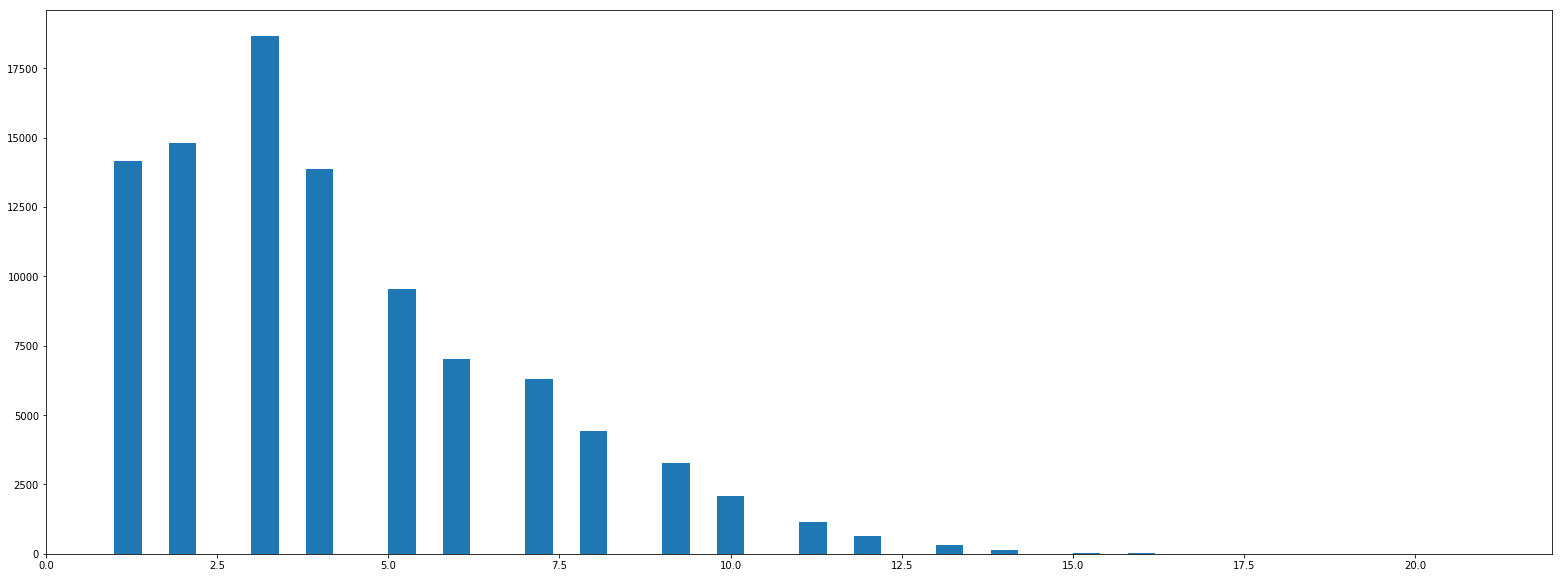

In [126]:
plt.figure(figsize=(27,10))
plt.hist(df_targ['len'], bins = 50);

In [128]:
df_test =  pd.DataFrame(test, columns = ['labels','file', 'len'])
df_train =  pd.DataFrame(train, columns = ['labels','file', 'len'])
df_val =  pd.DataFrame(val, columns = ['labels','file', 'len'])


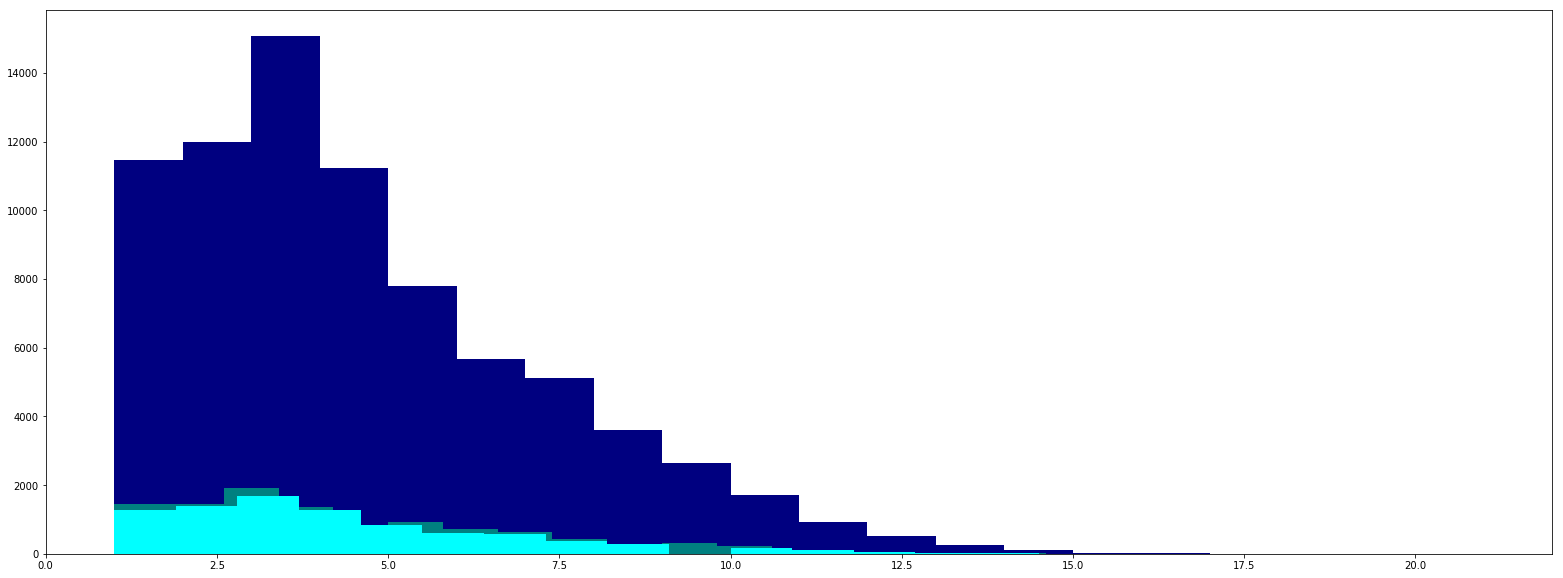

In [134]:
plt.figure(figsize=(27,10))
plt.hist(df_train['len'], color = 'navy', label = 'Training Dataset', bins = 20)
plt.hist(df_test['len'], color = 'teal', label = 'Testing Dataset', bins = 20)
plt.hist(df_val['len'], color = 'aqua', label = 'Validation Dataset', bins = 20);


96456

18662